# Example of marginalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=np.random.normal(0,0.2,100)
y=np.random.normal(0.7,0.1,100)
z=np.hstack([x,y])

In [3]:
z2=np.random.normal(0.5,0.1,200)

In [4]:
z3=np.hstack([np.random.normal(-0.5,0.1,100),np.random.normal(-0.2,0.1,100)])

(array([ 1.,  5., 15., 32., 26., 17.,  6., 34., 51., 13.]),
 array([-0.68755143, -0.51937825, -0.35120506, -0.18303187, -0.01485868,
         0.15331451,  0.3214877 ,  0.48966089,  0.65783408,  0.82600726,
         0.99418045]),
 <a list of 10 Patch objects>)

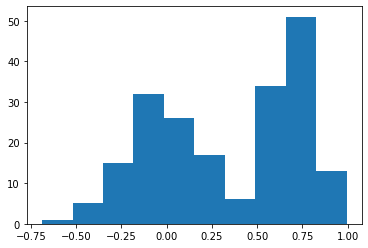

In [5]:
plt.hist(z)

In [6]:
from scipy import stats

In [7]:
kde=stats.gaussian_kde(z)

In [8]:
kde.covariance_factor()

0.3465724215775732

In [9]:
z_g=np.linspace(z.min(),z.max(),1000)

In [10]:
pdf=kde.evaluate(z_g)

(array([0.02973126, 0.14865628, 0.44596883, 0.95140017, 0.77301264,
        0.50543134, 0.17838753, 1.01086268, 1.51629402, 0.38650632]),
 array([-0.68755143, -0.51937825, -0.35120506, -0.18303187, -0.01485868,
         0.15331451,  0.3214877 ,  0.48966089,  0.65783408,  0.82600726,
         0.99418045]),
 <a list of 10 Patch objects>)

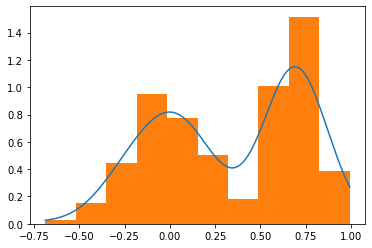

In [11]:
plt.plot(z_g,pdf)
plt.hist(z,density=True)

In [12]:
z_s=(z-z.mean())/(z.std())

1.0


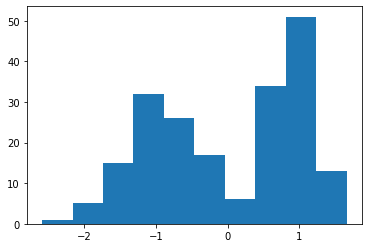

In [13]:
plt.hist(z_s)
print(z_s.std())

In [14]:
kde_s=stats.gaussian_kde(z_s)
kde_s.covariance_factor()

0.3465724215775732

In [15]:
z_gs=np.linspace(z_s.min(),z_s.max(),1000)
pdf_s=kde_s.evaluate(z_gs)

(array([0.01175612, 0.05878059, 0.17634177, 0.37619577, 0.30565906,
        0.199854  , 0.07053671, 0.39970801, 0.59956201, 0.15282953]),
 array([-2.59099931, -2.16568884, -1.74037838, -1.31506791, -0.88975744,
        -0.46444697, -0.0391365 ,  0.38617397,  0.81148444,  1.23679491,
         1.66210537]),
 <a list of 10 Patch objects>)

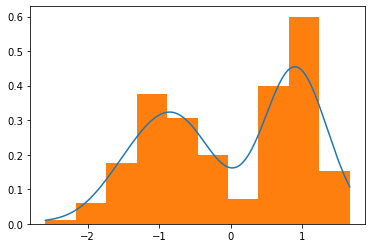

In [16]:
plt.plot(z_gs,pdf_s)
plt.hist(z_s,density=True)

In [17]:
kde_s.covariance_factor()

0.3465724215775732

In [18]:
kde_d=stats.gaussian_kde(z,bw_method=kde_s.covariance_factor())

In [19]:
pdf_d=kde_d.evaluate(z_g)

(array([0.02973126, 0.14865628, 0.44596883, 0.95140017, 0.77301264,
        0.50543134, 0.17838753, 1.01086268, 1.51629402, 0.38650632]),
 array([-0.68755143, -0.51937825, -0.35120506, -0.18303187, -0.01485868,
         0.15331451,  0.3214877 ,  0.48966089,  0.65783408,  0.82600726,
         0.99418045]),
 <a list of 10 Patch objects>)

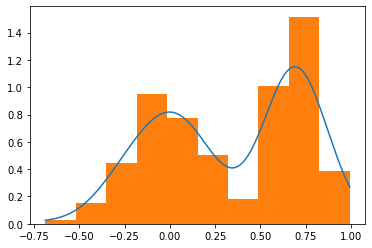

In [20]:
plt.plot(z_g,pdf_d)
plt.hist(z,density=True)

In [21]:
from sklearn.neighbors import KernelDensity

In [22]:
BW_1=0.3465724215775732*z.std()

In [23]:
kde_1d = KernelDensity(bandwidth = BW_1).fit(z[:, None])

In [24]:
pdf_k = np.exp(kde_1d.score_samples(z_g[:, None]))

(array([0.02973126, 0.14865628, 0.44596883, 0.95140017, 0.77301264,
        0.50543134, 0.17838753, 1.01086268, 1.51629402, 0.38650632]),
 array([-0.68755143, -0.51937825, -0.35120506, -0.18303187, -0.01485868,
         0.15331451,  0.3214877 ,  0.48966089,  0.65783408,  0.82600726,
         0.99418045]),
 <a list of 10 Patch objects>)

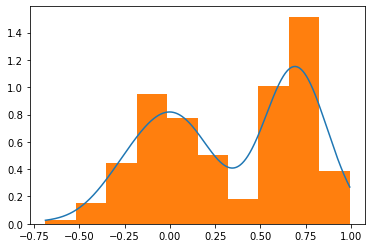

In [25]:
plt.plot(z_g,pdf_k)
plt.hist(z,density=True)

In [26]:
kde_s = KernelDensity(bandwidth = 0.3465).fit(z_s[:, None])
pdf_ks = np.exp(kde_s.score_samples(z_gs[:, None]))

(array([0.01175612, 0.05878059, 0.17634177, 0.37619577, 0.30565906,
        0.199854  , 0.07053671, 0.39970801, 0.59956201, 0.15282953]),
 array([-2.59099931, -2.16568884, -1.74037838, -1.31506791, -0.88975744,
        -0.46444697, -0.0391365 ,  0.38617397,  0.81148444,  1.23679491,
         1.66210537]),
 <a list of 10 Patch objects>)

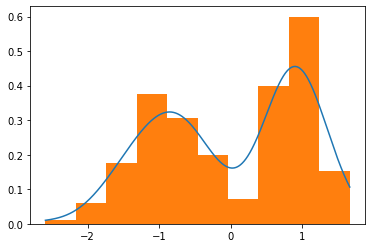

In [27]:
plt.plot(z_gs,pdf_ks)
plt.hist(z_s,density=True)

(array([0.02973126, 0.14865628, 0.44596883, 0.95140017, 0.77301264,
        0.50543134, 0.17838753, 1.01086268, 1.51629402, 0.38650632]),
 array([-0.68755143, -0.51937825, -0.35120506, -0.18303187, -0.01485868,
         0.15331451,  0.3214877 ,  0.48966089,  0.65783408,  0.82600726,
         0.99418045]),
 <a list of 10 Patch objects>)

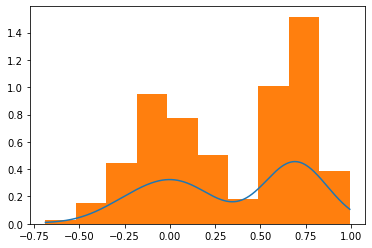

In [28]:
plt.plot(z_g,pdf_ks)
plt.hist(z,density=True)

## 2D

In [29]:
z_g=np.linspace(z.min(),z.max(),30)
z_g2=np.linspace(z2.min(),z2.max(),50)

In [30]:
z_g3=np.linspace(z3.min(),z3.max(),100)

In [31]:
z_s=(z-z.mean())/(z.std())
z2_s=(z2-z2.mean())/(z2.std())

In [32]:
data_example = np.vstack([z_s, z2_s]).T

In [33]:
kde_example = KernelDensity(bandwidth=0.34).fit(data_example)

In [34]:
z_gs=np.linspace(z_s.min(),z_s.max(),30)
z_gs2=np.linspace(z2_s.min(),z2_s.max(),50)

In [35]:
X, Y = np.meshgrid(z_gs, z_gs2)
xy = np.vstack([X.ravel(), Y.ravel()]).T

In [36]:
data_example.shape

(200, 2)

In [37]:
pdf=np.exp(kde_example.score_samples(xy))

In [38]:
pdf=pdf.reshape(50,30)

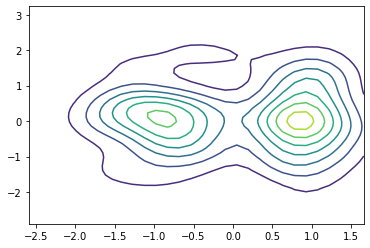

In [39]:
plt.contour(X,Y,pdf)

In [40]:
z_s=(z-z.mean())/(z.std())
z2_s=(z2-z2.mean())/(z2.std())
z3_s=(z3-z3.mean())/(z3.std())

In [41]:
z_gs=np.linspace(z_s.min(),z_s.max(),30)
z_gs2=np.linspace(z2_s.min(),z2_s.max(),50)
z_gs3=np.linspace(z3_s.min(),z3_s.max(),100)

In [42]:
data_example = np.vstack([z_s, z2_s, z3_s]).T

In [43]:
kde_example = KernelDensity(bandwidth=0.34).fit(data_example)

In [44]:
X, Y, Z = np.meshgrid(z_gs, z_gs2,z_gs3)
xyz = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

In [45]:
pdf=np.exp(kde_example.score_samples(xyz))

In [46]:
pdf=pdf.reshape(50, 30, 100)

In [47]:
Xp, Yp, = np.meshgrid(z_gs, z_gs2)

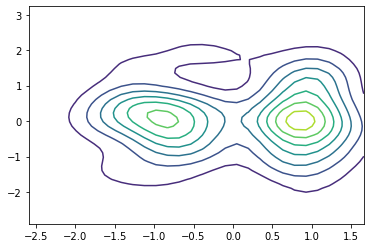

In [48]:
plt.contour(Xp,Yp,pdf.sum(axis=2))

In [51]:
Xo, Yo = np.meshgrid(z_g, z_g2)

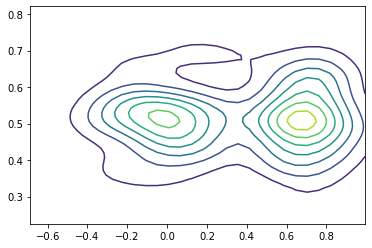

In [53]:
plt.contour(Xo,Yo,pdf.sum(axis=2))

In [54]:
priory = stats.norm.pdf(z_g2,0.55,0.005)

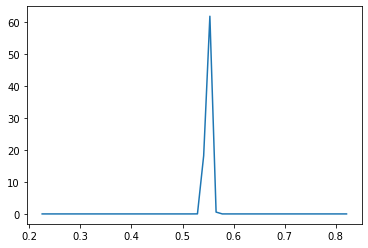

In [55]:
plt.plot(z_g2,priory)

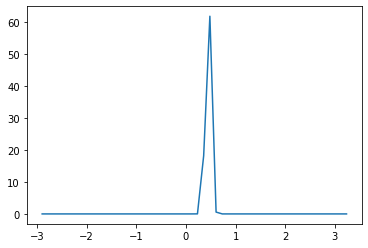

In [56]:
plt.plot(z_gs2,priory)

In [57]:
priorx = stats.norm.pdf(z_g,0.65,0.05)

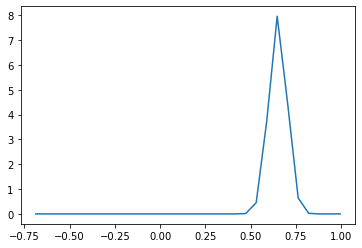

In [58]:
plt.plot(z_g,priorx)

In [59]:
eye = np.ones([50,30])*priorx

In [60]:
eye.T*priory

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
pr2d=((np.ones([50,30]).T*priory).T)*priorx

In [85]:
priory.shape

(50,)

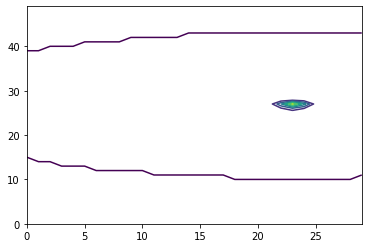

In [62]:
plt.contour(pr2d)

In [86]:
pr2d.shape

(50, 30)

In [64]:
pr2d.sum(axis=0).shape

(30,)

In [65]:
(z_gs[1]-z_gs[0])

0.14665878233516905

In [66]:
norm_pr=(pr2d.sum(axis=0)*(z_gs[1]-z_gs[0])).sum()*(z_gs2[1]-z_gs2[0])
norm_pr

25.563435765177857

In [67]:
pr2d = pr2d/norm_pr
prior = pr2d/norm_pr

In [89]:
prior.T.shape

(30, 50)

In [68]:
z_g2=np.linspace(z2.min(),z2.max(),50)

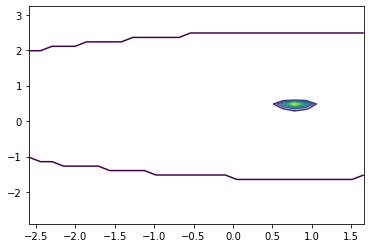

In [69]:
plt.contour(Xp,Yp,pr2d)

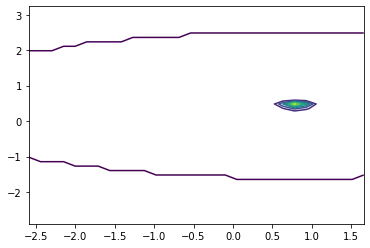

In [70]:
plt.contour(Xp,Yp,pr2d*pdf.sum(axis=2))

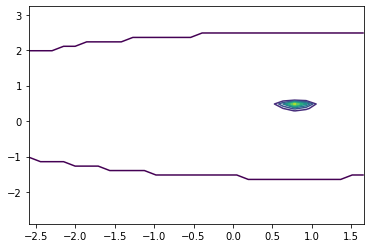

In [71]:
plt.contour(Xp,Yp,((pdf.T*pr2d.T).T).sum(axis=2))

In [120]:
pdf.shape

(30, 50, 100)

In [113]:
pr = prior

In [114]:
pr.shape

(30, 50)

In [99]:
pdf=pdf.reshape(30, 50,  100)
pdf.shape

(30, 50, 100)

In [125]:
(pdf.T*pr.T).T.shape

(30, 50, 100)

(30, 50, 100)

In [73]:
post=(((pdf.T*pr2d.T).T).sum(axis=0)).sum(axis=0)

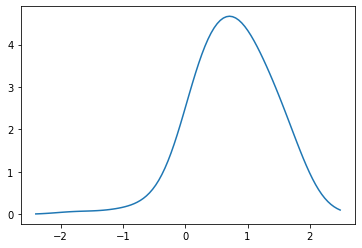

In [74]:
plt.plot(z_gs3,post)

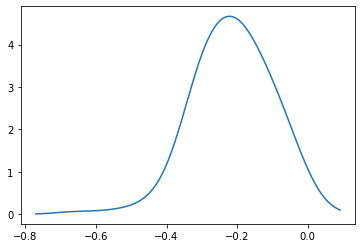

In [75]:
plt.plot(z_g3,post)

In [76]:
pr2d.sum()*(z_g2[1]-z_g2[0])

0.6618696497566641

In [77]:
pdf.T*pr2d.T

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [78]:
(pdf.T*prior.T).T.shape

(50, 30, 100)

TypeError: Input z must be 2D, not 3D

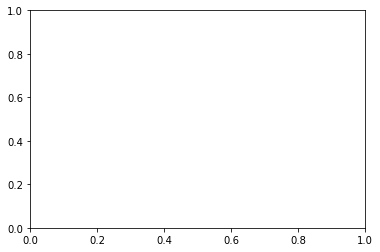

In [79]:
plt.contour((pdf.T*prior.T).T)

In [ ]:
matrix=(pdf.T*prior.T).T

In [80]:
post=matrix.sum(axis=0)

NameError: name 'matrix' is not defined

In [81]:
#plt.contour(z_gs,post)

In [82]:
#plt.plot(z_g,post)

In [83]:
post.sum()*(z_g[1]-z_g[0])

9.456023820366159